# Polynomial Regression

## Fish Market Raw Data

The fish market dataset is a collection of data related to various species of fish and their characteristics. This dataset is designed for polynomial regression analysis and contains several columns with specific information.
From: https://www.kaggle.com/datasets/vipullrathod/fish-market/data

In [35]:
# Begin by importing necessary libraries to start this exercise

import numpy as np  # always useful for Scikit-learn
import pandas as pd # always usefull for data preparation
import os.path      # work with files within this environment

# Check if the file was already downloaded, if so, remove it

from pathlib import Path
my_file = Path("Fish.csv")
if my_file.is_file():
   os.unlink("Fish.csv")

# download the file from github, use -q for quiet
# use --show-progress to show download progress only

!wget -q --show-progress https://raw.githubusercontent.com/coyoacan/Practice-in-Colab/refs/heads/main/source-files/Fish.csv
dataset = pd.read_csv('Fish.csv')

# See which kind of features we are dealing with

dataset.info()

# make a copy of this dataframe for EDA purposes

df = dataset.copy()


Fish.csv            100%[===================>]   5.88K  --.-KB/s    in 0s      
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [36]:
 df['Species'].value_counts(dropna=False)

,count
Species,
Perch,56
Bream,35
Roach,20
Pike,17
Smelt,14
Parkki,11
Whitefish,6


## Visualize Data

Perch is a common name for freshwater fish from the genus Perca, which belongs to the family Percidae of the large order Perciformes.
The European perch (P. fluviatilis) is primarily found in Europe, but a few can also be found in South Africa, and even as far east on the Southern hemisphere as Australia.
Perch are classified as carnivores, choosing waters where smaller fish, shellfish, zooplankton, and insect larvae are abundant.
Perch are a popular sport fish species. They are known to put up a fight, and to be good for eating. They can be caught with a variety of methods, including float fishing, lure fishing, and legering. (Wikipedia)

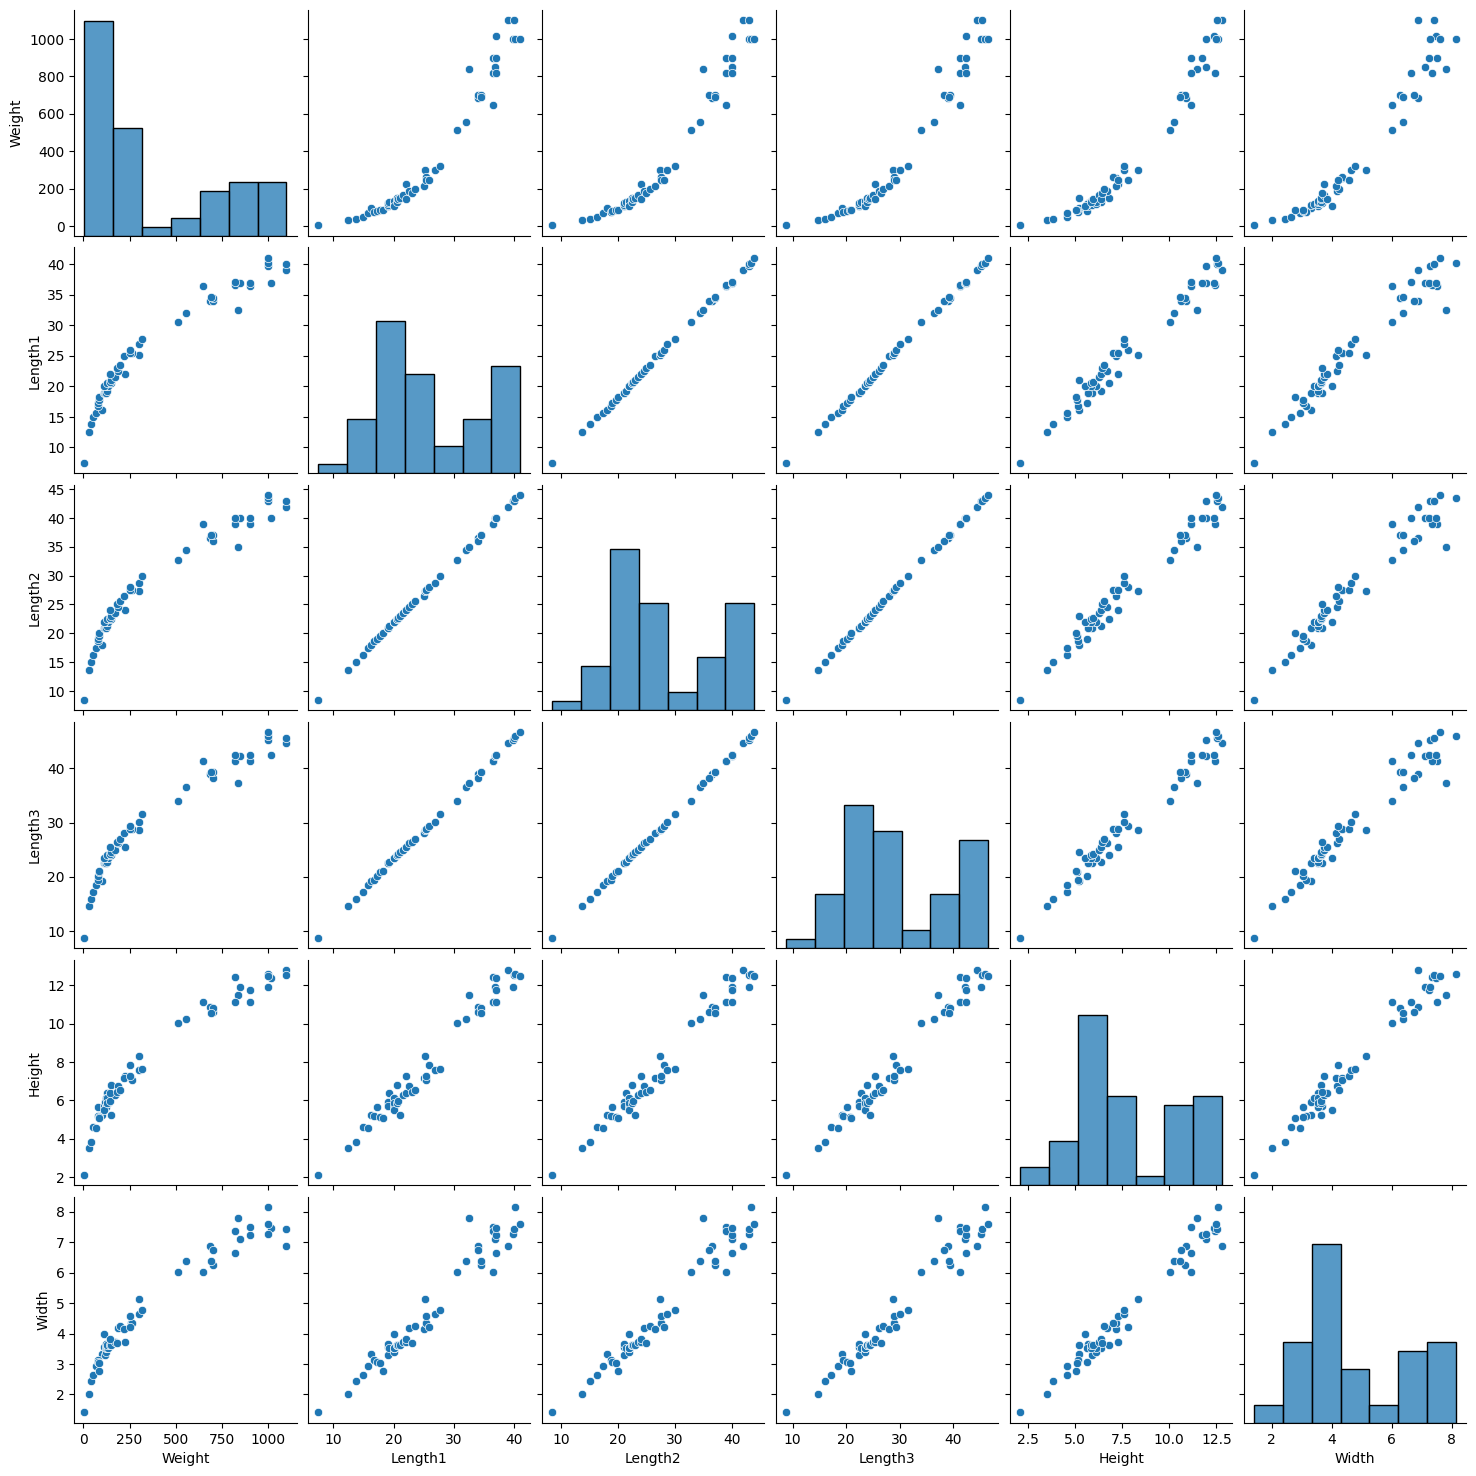

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df[df["Species"]=="Perch"])
plt.show()

## Quick Feature Importance Analysis

In [39]:
# decision tree for feature importance on a regression problem
from sklearn.tree import DecisionTreeRegressor

# select values for Perch Species
Perch = df[df["Species"]=="Perch"]

# define X and y

X = Perch.drop(["Species", "Weight"], axis=1).to_numpy()
y = Perch["Weight"].to_numpy()

# define the model

model = DecisionTreeRegressor()

# fit the model
model.fit(X, y)

# get importance
importance = model.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

# Remember to add two positions since we dropped Species and Weight

print("\nLooks like the most important feature is:",
      Perch.columns[importance.argmax()+2])

Feature: 0, Score: 0.90114
Feature: 1, Score: 0.00252
Feature: 2, Score: 0.00696
Feature: 3, Score: 0.02765
Feature: 4, Score: 0.06172

Looks like the most important feature is: Length1


## First approach: Simple Linear Regression

In [59]:
from sklearn.linear_model import LinearRegression

X_ = Perch["Length1"].to_numpy()
y_ = Perch["Weight"].to_numpy()

# I know this is infuriating but we always have to reshape X

X_ = X_.reshape(-1, 1)

reg = LinearRegression().fit(X_, y_)
reg.score(X_, y_)

0.9184562151546277

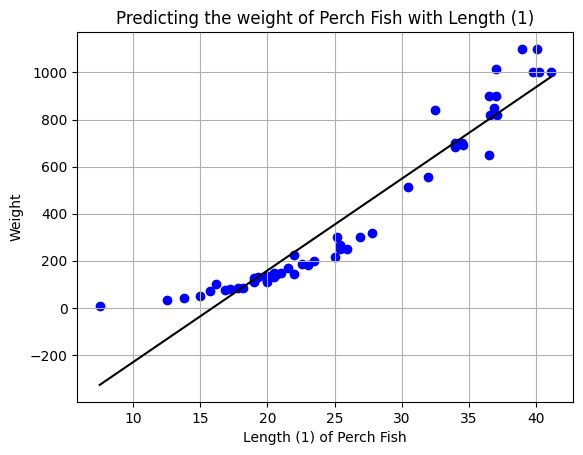

In [76]:
plt.scatter(X_, y_,color='b')
plt.plot(X_, reg.predict(X_),color='k')

# draw gridlines
plt.grid(True)

#Labels
plt.title("Predicting the weight of Perch Fish with Length (1)")
plt.xlabel("Length (1) of Perch Fish")
plt.ylabel("Weight")

plt.show()

## Next approach: Polynomial Regression

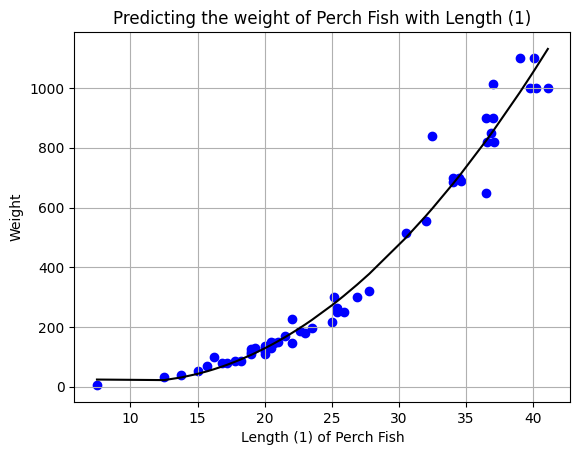


---- Score comparison between linear and polynomial regressions----

R2 Score: 0.9718393389317337

R2 Score: 0.9184562151546277

-------------------------------------------------------------------

533.8312377710597  bps improvement


In [82]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# 2nd degree polynomial equation

poly = PolynomialFeatures(degree=2, include_bias=False)

# Transform X_

poly_features = poly.fit_transform(X_)

# Polynomial Regression Model

poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y)


# Predict
y_predicted = poly_reg_model.predict(poly_features)

# Visualize

plt.grid(True)

plt.title("Predicting the weight of Perch Fish with Length (1)")
plt.xlabel("Length (1) of Perch Fish")
plt.ylabel("Weight")

plt.scatter(X_, y_,color='b')
plt.plot(X_, y_predicted, c="k")
plt.show()

print("\n---- Score comparison between linear and polynomial regressions----\n")
print("R2 Score:", poly_reg_model.score(poly_features, y_))
print("\nR2 Score:", reg.score(X_, y_))
print("\n-------------------------------------------------------------------\n")
print((poly_reg_model.score(poly_features, y_)-reg.score(X_, y_))*10000," bps improvement")
